In [1]:
# importing the libraries
import pandas as pd
import numpy as np
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data
df=pd.read_csv(r'/home/vanchhit/Downloads/people.csv')

In [3]:
# display top 5 records
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [4]:
# check the columns
list(df.columns)

['satisfactoryLevel',
 'lastEvaluation',
 'numberOfProjects',
 'avgMonthlyHours',
 'timeSpent.company',
 'workAccident',
 'left',
 'promotionInLast5years',
 'dept',
 'salary']

In [5]:
# to display the overview of a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df['timeSpent.company']

0        3
1        6
2        4
3        3
4        3
        ..
14994    4
14995    2
14996    4
14997    5
14998    3
Name: timeSpent.company, Length: 14999, dtype: int64

In [7]:
df.salary

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994    medium
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: object

In [8]:
df.rename(columns = {'timeSpent.company':'timeSpent_company'}, inplace = True)

In [9]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [10]:
# checking the shape of dataset (no of rows & no of cols)
df.shape

(14999, 10)

In [11]:
# checking for duplicate values
df.duplicated().sum()

3008

In [12]:
df=df.drop_duplicates(keep="first")

In [13]:
df.shape

(11991, 10)

In [14]:
# to check the null value
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent_company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

## Normality Test

Check whether the data is normally distributed or not in satisfactory level column using shapiro-wilk test

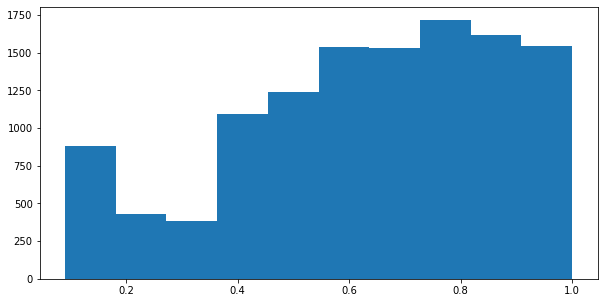

In [15]:
# plotting histogram to visualize the distribution of data
plt.figure(figsize=(10,5))
plt.hist(df["satisfactoryLevel"])
plt.show()

<AxesSubplot:xlabel='satisfactoryLevel', ylabel='Density'>

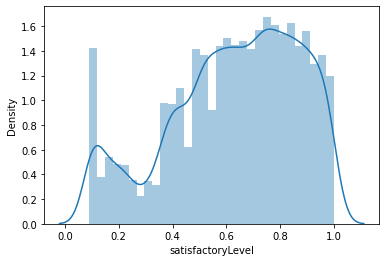

In [16]:
sns.distplot(df["satisfactoryLevel"])

<AxesSubplot:xlabel='satisfactoryLevel', ylabel='Density'>

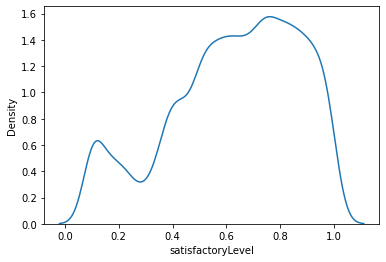

In [17]:
sns.kdeplot(x='satisfactoryLevel', data=df)

### h0 - Null Hypothesis
### h1 - Alternate Hypothesis
#h0 - data is normally distributed
#h1 - data is not normally distributed

In [18]:
stat,p_value=shapiro(df["satisfactoryLevel"])

In [19]:
print(p_value)

0.0


In [20]:
print(stat)

0.9526869654655457


#p value is less than 0.05 reject null hypothesis, data is not normally distributed

In [22]:
# salary is categorical data
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [23]:
df['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [24]:
df1=df

In [25]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14992,0.30,0.88,5,245,4,0,0,0,hr,low
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [26]:
# Converting the catagorical data into numeral data using Label Encoder 
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
df1["salary"]=l1.fit_transform(df1["salary"])
df1["dept"]=l1.fit_transform(df1["dept"])
 # fit()-> input the data
 # transform()->to apply the changes   
 # fit_transform()-> data will be inputted and necessary canges will be updated onto the object

In [28]:
df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


In [29]:
df1['salary'].unique()

array([1, 2, 0])

In [30]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


In [31]:
df1.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.006941,0.007216
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,0.004309,0.007091
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,0.010101,0.003199
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.000623,0.002727
timeSpent_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.017806,0.000369
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,0.006560,-0.003654
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,0.018286,0.004224
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,-0.023826,0.004832
dept,0.006941,0.004309,0.010101,0.000623,-0.017806,0.006560,0.018286,-0.023826,1.000000,0.006702
salary,0.007216,0.007091,0.003199,0.002727,0.000369,-0.003654,0.004224,0.004832,0.006702,1.000000


### Correlation Graph

<AxesSubplot:>

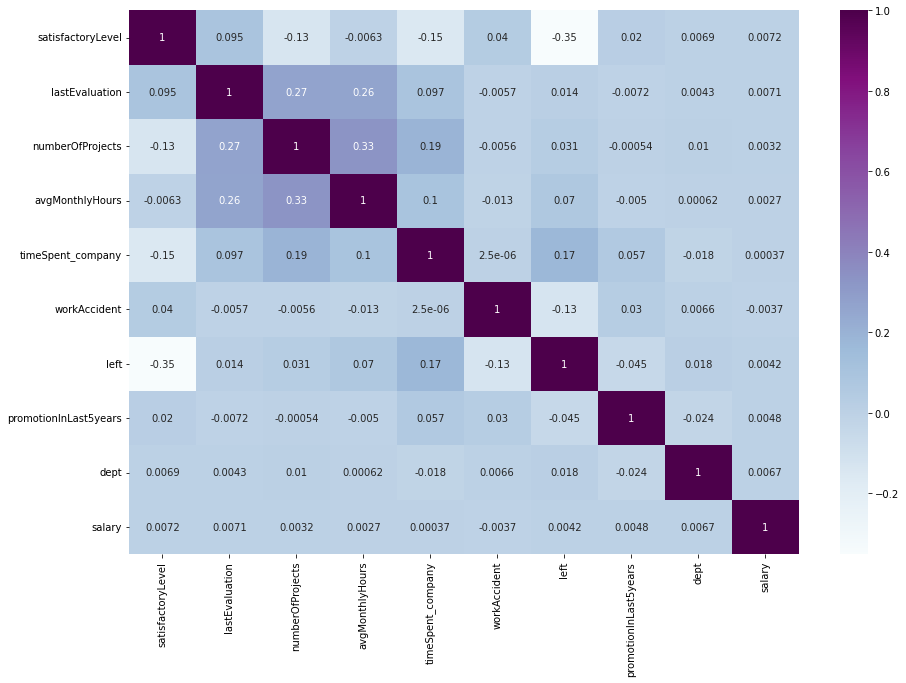

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cmap="BuPu")

In [33]:
# Descriptive statistics
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,5.871153,1.356184
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,2.899022,0.628071
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [34]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


In [35]:
df.shape

(11991, 10)

In [36]:
# Random experiment
emp = df[(df.satisfactoryLevel>=0) & (df.satisfactoryLevel<=0.50) 
         & (df.timeSpent_company==2) & (df.avgMonthlyHours>=130) & (df.avgMonthlyHours<=200)]

In [37]:
emp.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
35,0.13,0.78,6,152,2,0,1,0,8,1
379,0.48,0.78,2,198,2,0,1,0,9,2
413,0.34,0.67,4,141,2,0,1,0,7,1
1239,0.14,0.47,4,175,2,0,1,0,1,2
1426,0.19,0.58,5,182,2,0,0,0,9,2


In [38]:
emp["left"].value_counts()

0    211
1      6
Name: left, dtype: int64

In [39]:
emp['salary'].value_counts()

1    114
2     89
0     14
Name: salary, dtype: int64

In [40]:
emp.shape

(217, 10)

In [41]:
emp.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
satisfactoryLevel,1.000000,0.021638,-0.217151,0.024962,NaN,0.025751,-0.215200,0.047443,-0.113350,0.030787
lastEvaluation,0.021638,1.000000,0.094969,0.001310,NaN,-0.002001,0.122231,-0.089724,0.003506,0.007181
numberOfProjects,-0.217151,0.094969,1.000000,-0.047254,NaN,-0.064793,0.115917,-0.020698,0.050600,-0.153083
avgMonthlyHours,0.024962,0.001310,-0.047254,1.000000,NaN,-0.053849,-0.043436,0.043453,0.032331,-0.002823
timeSpent_company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
workAccident,0.025751,-0.002001,-0.064793,-0.053849,NaN,1.000000,-0.072686,0.018301,0.118904,0.069108
left,-0.215200,0.122231,0.115917,-0.043436,NaN,-0.072686,1.000000,-0.025897,0.053947,-0.003477
promotionInLast5years,0.047443,-0.089724,-0.020698,0.043453,NaN,0.018301,-0.025897,1.000000,-0.069426,0.065548
dept,-0.113350,0.003506,0.050600,0.032331,NaN,0.118904,0.053947,-0.069426,1.000000,0.069257
salary,0.030787,0.007181,-0.153083,-0.002823,NaN,0.069108,-0.003477,0.065548,0.069257,1.000000


In [42]:
emp["avgMonthlyHours"].mean()

167.2258064516129

### T-test

#t-test
#It is used to determine if there is a significant difference between the means of two groups 

### One sample t-test

#One sample t-test - It tells us whether the means of the sample and the population are different or not

The average monthly hours of a employee having 2 years experience is 167. Is it same for employees having more than 2 years experience?

Condition - Satisfactory level of a employee is from 0-0.5 and AvgMonthlyhours is from 130-200


In [53]:
from scipy.stats import ttest_1samp

In [45]:
employee = df[(df.satisfactoryLevel>=0) & (df.satisfactoryLevel<=0.50) 
              & (df.timeSpent_company>=3) & (df.avgMonthlyHours>=130) & (df.avgMonthlyHours<=200)]

In [46]:
employee.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1
7,0.42,0.53,2,142,3,0,1,0,7,1
8,0.45,0.54,2,135,3,0,1,0,7,1


In [47]:
employee.shape

(1462, 10)

#Null Hypothesis - Avg monthly hours of a employee having 2 yrs exp and the employee more than that is same i.e, 167 hrs 
#Alternate Hypothesis - Avg monthly hours of a employee having 2 yrs exp doesnot have same avg monthly hours with more than 2 yrs exp employee

In [49]:
# selecting a random sample
sample_size= 100
sample1= employee.sample(sample_size,random_state=0)

In [50]:
sample1

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
1685,0.17,0.76,4,171,5,0,0,0,6,1
11633,0.46,0.46,2,145,3,0,1,0,0,0
1250,0.45,0.53,2,159,3,0,1,0,7,1
774,0.45,0.49,2,144,3,0,1,0,2,1
3506,0.50,0.38,5,175,4,0,0,0,9,0
...,...,...,...,...,...,...,...,...,...,...
27,0.38,0.46,2,137,3,0,1,0,9,1
6314,0.37,0.72,2,163,3,0,0,0,7,1
2083,0.45,0.39,2,167,3,0,0,0,8,2
5162,0.12,0.39,5,161,4,0,0,0,0,1


In [51]:
# population mean
pos_mean=167

In [52]:
# sample mean
print(sample1["avgMonthlyHours"].mean())

154.2


In [54]:
statistics,pvalue=ttest_1samp(sample1["avgMonthlyHours"],pos_mean)
print(statistics,pvalue)

-6.812850056008294 7.534573793907689e-10


In [55]:
# Degrees of freedom
n=len(employee["avgMonthlyHours"])
dof=n-1
print(n,dof)

1462 1461


In [57]:
alpha=0.05

In [58]:
from scipy.stats import t

In [59]:
cv=t.ppf([alpha/2,1-alpha/2],dof)
print(cv) 
#ppf-percent point function(it fetch the range when t test is done)
     #inverse of cdf(cummulative density function)

[-1.96158904  1.96158904]


#p value is less than 0.05
#Reject Null Hypothesis,avg monthly hours is not 167 hours for employees having more than 2 yrs of exp

### One Sample Z test for proportion

The percentage of employee leaving the company 
is 3% having experience of 2 years. Is it
 same for employees having more than 2
years experience?

#Null hypothesis - percentage of employee leaving the company having the exp of 2 years is same as employee having exp more than 2 yrs
#Alternate hypothesis - percentage of employee leaving the company having the exp of 2 years is different from the employee having exp more than 2 yrs

In [63]:
from statsmodels.stats.proportion import proportions_ztest

In [64]:
sample_size=100
sample1=employee.sample(sample_size,random_state=0)
count=sample1["left"].value_counts()

In [67]:
count

1    63
0    37
Name: left, dtype: int64

In [68]:
nobs=len(sample1["left"])
nobs

In [70]:
p0=0.3

In [71]:
sample1["left"].value_counts()/nobs

1    0.63
0    0.37
Name: left, dtype: float64

In [72]:
statistic_oneprop,pvalue_oneprop = proportions_ztest(count = count,
                                                     nobs = nobs,value = p0,
                                                     alternative = "two-sided",prop_var = False)

In [73]:
print(statistic_oneprop,pvalue_oneprop)

-0.5656854249492378 0.5716076449533316


#p value is greater than 0.05 accept null hypothesis and reject alternate hypothesis 
#percentage of employee leaving the company having the exp of 2 years is same as employee having exp more than 2 yrs

In [75]:
from scipy.stats import norm
cv_norm=norm.ppf([alpha/2,1-alpha/2])
print(cv_norm)

[-1.95996398  1.95996398]


### Two sample t-test

#Two sample test for means - compared the means of a two independent groups

In [77]:
df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


In [78]:
df1["timeSpent_company"].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7])

Is the mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 - 10 yrs ?

#checking the variance of both

In [80]:
e1=df1[(df1.timeSpent_company>=2) & (df1.timeSpent_company<=5)]
e2=df1[(df1.timeSpent_company>=6) & (df1.timeSpent_company<=10)]

In [81]:
e1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1
5,0.10,0.77,6,247,4,0,1,0,7,1


In [82]:
e1.shape

(11167, 10)

In [83]:
e2.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
1,0.80,0.86,5,262,6,0,1,0,7,2
13,0.78,0.99,4,255,6,0,1,0,7,1
26,0.84,0.87,4,246,6,0,1,0,3,1
33,0.57,0.70,3,273,6,0,1,0,8,1
63,0.90,1.00,5,221,6,0,1,0,7,2


In [84]:
e2.shape

(824, 10)

In [85]:
s1=e1.sample(200,random_state=0)
s2=e2.sample(200,random_state=0)

In [86]:
import scipy

In [87]:
scipy.stats.ttest_ind(s1["avgMonthlyHours"],s2["avgMonthlyHours"])

Ttest_indResult(statistic=-0.058969634159925566, pvalue=0.9530058909644643)

#p value > 0.05 Hence accept null hypothesis
#The mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 - 10 yrs

### F-statistics 

Compute the f-statistics of the previous problem statement

#F-test for variance is used to test if the variances of two populations are equal.

In [90]:
# Sample Variance 
print(s1.avgMonthlyHours.var())
print(s2.avgMonthlyHours.var())

2324.24620603015
2680.904522613066


In [91]:
# Sample mean
print(s1.avgMonthlyHours.mean())
print(s2.avgMonthlyHours.mean())

203.005
203.3


In [92]:
# Degrees of freedom for sample
df1=len(s1)-1
df2=len(s2)-1

In [93]:
# Computing f statistic
from scipy.stats import f
F=s1.avgMonthlyHours.var()/s2.avgMonthlyHours.var()
print(F)


0.8669634395501401


In [94]:
import scipy.stats

In [95]:
scipy.stats.f.cdf(F, df1, df2)

0.15739115729495057

In [96]:
f.ppf([alpha/2,1-alpha/2],df1, df2)

array([0.75678659, 1.32137648])

#p value is >0.05, accept null hypothesis, equal variances